This Notebook benchmarks read/write speeds for Arrow and Pandas.
It is run on a ```Intel(R) Xeon(R) CPU E5-1650 v3 @ 3.50GHz``` / ```128GB RAM``` server with ```Ubuntu 22.04.1 LTS```.

NOTE: Here we aren't accounting for the significantly faster arrow batch reading functions.

# **Visualized Results @ end of notebook**

In [2]:
import lib.io_ as io
import pandas as pd
from time import monotonic

# READ TIME

In [9]:
%%time
start_pandas_read = monotonic()
df = io.load_path_pandas('/data/mlhd-zstd/d3/d38db397-d7b6-47fd-b57b-d2ba0001374e.csv.zst')
end_pandas_read = monotonic()

CPU times: user 50.5 ms, sys: 0 ns, total: 50.5 ms
Wall time: 49 ms


In [10]:
%%time
start_arrow_read = monotonic()
df_arrow = io.load_path('/data/mlhd-zstd/d3/d38db397-d7b6-47fd-b57b-d2ba0001374e.csv.zst')
end_arrow_read = monotonic()

CPU times: user 43.3 ms, sys: 24.1 ms, total: 67.4 ms
Wall time: 34.2 ms


In [11]:
%%time
start_pandas_batch_read = monotonic()
df_load_path_file = io.load_path_file_pandas('/home/snaek/MLHD/warehouse/samples/random_file_paths.txt')
end_pandas_batch_read = monotonic()

CPU times: user 3.17 s, sys: 123 ms, total: 3.29 s
Wall time: 3.29 s


In [12]:
%%time
start_arrow_batch_read = monotonic()
df_load_path_file_arrow = io.load_path_file('/home/snaek/MLHD/warehouse/samples/random_file_paths.txt')
end_arrow_batch_read = monotonic()

CPU times: user 4.18 s, sys: 445 ms, total: 4.62 s
Wall time: 2.74 s


# WRITE TIME

In [17]:
## Setting Up config
import config
ENV = {name: values for name, values in vars(config).items() if not name.startswith("__")}

paths = io.generate_paths(ENV['MLHD_ROOT'])

df = io.load_path(paths[50])
df

,timestamp,artist_MBID,release_MBID,recording_MBID
0,1242583679,ba85753c-671a-409e-b813-1e3be41e2a2e,0a2d7193-fc4b-418c-8581-08d2695f884a,0d7960f0-ee33-4868-8e9e-7c705558b6e5
1,1242583969,f660d7e2-a3bd-4456-a7be-86ec139c1016,6ecac165-0267-3822-b995-cda1282ea5b5,6afc8617-d545-4629-8151-9ee9d71c4742
2,1242584191,371f152d-1643-4b54-b32b-dd13d4c23442,59c844ca-4c11-452d-8330-c107892319eb,e2477990-d9b1-43b6-b8db-be03e43559c4
3,1242584530,98fb7792-01fa-4ed1-a15d-20077a47210f,NaN,1fdcf214-b4d5-4490-8626-5afeda04b73d
4,1242584820,d50a4b89-ff1f-4659-9fde-f76f8d5b3c89,NaN,657cf27c-8f4a-4758-aaaa-bd5686d7e103
...,...,...,...,...
105041,1362539926,e61ce7e2-f78d-4fee-ac56-ef1a784c87fa,331c66e6-c230-455b-b84c-3a81d24b55fb,724801b2-8540-4619-8c90-2d3ad30275da
105042,1362540203,e61ce7e2-f78d-4fee-ac56-ef1a784c87fa,331c66e6-c230-455b-b84c-3a81d24b55fb,94c5fb28-66e1-49cf-8cdd-3d876683eef6
105043,1362540416,e61ce7e2-f78d-4fee-ac56-ef1a784c87fa,331c66e6-c230-455b-b84c-3a81d24b55fb,2de962ae-b1e0-46d1-80d8-25dfe55f87ff
105044,1362540609,e61ce7e2-f78d-4fee-ac56-ef1a784c87fa,331c66e6-c230-455b-b84c-3a81d24b55fb,NaN


In [18]:
%%time
start_write_pandas = monotonic()
io.write_frame_pandas(df, original_path = paths[50]+'_pandas')
end_write_pandas = monotonic()

CPU times: user 585 ms, sys: 0 ns, total: 585 ms
Wall time: 583 ms


In [19]:
%%time
start_write_arrow = monotonic()
io.write_frame(df, original_path = paths[50]+'_arrow')
end_write_arrow = monotonic() 

CPU times: user 50.4 ms, sys: 20 ms, total: 70.3 ms
Wall time: 81.2 ms


# VISUALIZATIONS

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
labels = [
    'READ', 
    'BATCH_READ', 
    'WRITE']

pandas_times = [
    round(end_pandas_read - start_pandas_read, 3),
    round(end_pandas_batch_read - start_pandas_batch_read, 3),
    round(end_write_pandas - start_write_pandas, 3)
    ]

arrow_times = [
    round(end_arrow_read - start_arrow_read, 3),
    round(end_arrow_batch_read - start_arrow_batch_read, 3),
    round(end_write_arrow - start_write_arrow, 3)
    ]

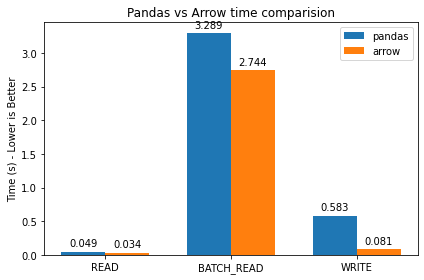

In [103]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pandas_times, width, label='pandas')
rects2 = ax.bar(x + width/2, arrow_times, width, label='arrow')

ax.set_ylabel('Time (s) - Lower is Better')
ax.set_title('Operation')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.title('Pandas vs Arrow time comparision')
plt.show()

<Figure size 432x288 with 0 Axes>

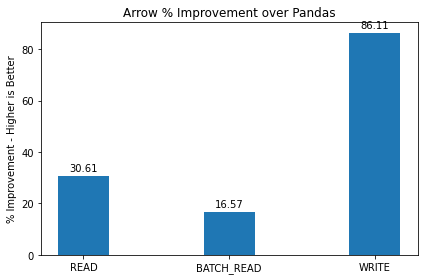

In [104]:
plt.figure()

improvement_calculator = lambda x, y: round((x - y) / x * 100, 2)
percent_improvements = [(improvement_calculator(x, y)) for x, y in zip(pandas_times, arrow_times)]
labels = ['READ', 'BATCH_READ', 'WRITE']

fig, ax = plt.subplots()
rects = ax.bar(x, percent_improvements, width)

ax.set_ylabel('% Improvement - Higher is Better')
ax.set_title('Operation')
ax.set_xticks(x, labels)

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.title('Arrow % Improvement over Pandas')
plt.show()